## Load outer libraries

In [3]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

## Load my libraries

In [2]:
from spikeHelper.experiments import expAllRats, eachCross, eachSame
from spikeHelper.dataOrganization import singleRatResults, trialToXyT, getX
from spikeHelper.visuals import evolutionPlot

In [81]:
#results = expAllRats()
filename = 'semAtividadeMotora_1300ms_1608_50train'
#pickle.dump(results, open('Results/'+str(filename),'wb'))
results = pickle.load( open('Results/'+str(filename),'rb') )

Alinhar pela direita, observar ERP atividade motora, desvio etc DONE

1 a 1.5 vertical
2 a 2.5 horizontal

Classificador sem atividade motora

Desempenho por n. neuronios

Reduzir numero de trials de treino. 40?30?

Novo pente fino sobre qualidade neuronal DONE

# Resultado médio para cada aspecto

In [165]:
results.iloc[:4,:8].applymap(lambda x: np.nan_to_num(x).mean())

,Late corr,Late kappa,Early corr,Early kappa,Cross late train corr,Cross late train kappa,Cross early train corr,Cross early train kappa
rat 7,0.027215,0.014368,0.105102,0.018684,0.049471,0.030386,0.045738,0.023199
rat 8,0.529541,0.094105,0.549914,0.073789,0.508908,0.393856,0.453197,0.330522
rat 9,0.122592,0.036947,0.479977,0.048632,0.081480,0.078459,0.034088,0.017280
rat 10,0.387614,0.040105,0.505432,0.056211,0.274337,0.159300,0.204300,0.133424


In [149]:
r=results.iloc[:4,:4]
r['rat']=r.index
r=r.melt(id_vars=['rat'],var_name='type')
r['measure'] = r['type'].apply(lambda x: 'kappa' if 'kappa' in x.lower() else 'corr')
r['type'] = r['type'].apply(lambda x: (x[:-5]) if 'kappa' in x.lower() else (x[:-4]))

In [160]:
melted = pd.concat([r, pd.DataFrame(np.vstack(r['value'].apply(lambda x: x.reshape(-1))))],axis=1 ).drop('value',axis=1).melt(id_vars=['rat','measure','type'])
melted.head()

,rat,measure,type,variable,value
0,rat 7,corr,Late,0,3.958395e-01
1,rat 8,corr,Late,0,6.681165e-01
2,rat 9,corr,Late,0,-1.837829e-01
3,rat 10,corr,Late,0,1.863695e-01
4,rat 7,kappa,Late,0,2.220446e-16


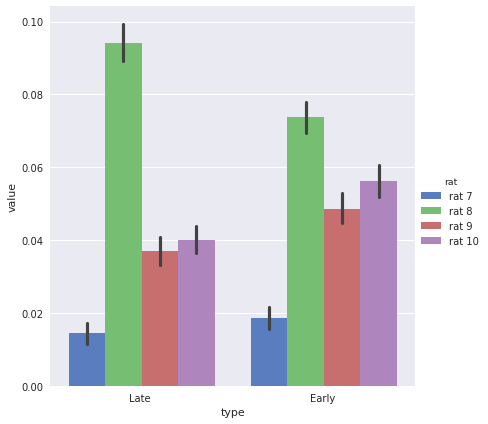

In [169]:
sns.factorplot(x="type", y="value", hue='rat', data=melted[melted['measure']=='kappa'],
                   size=6, kind="bar", palette="muted")

### Desvio padrão

In [13]:
results.iloc[:4,:8].apply(lambda x: x.apply(lambda x: np.nan_to_num(x).std()))

,Late corr,Late kappa,Early corr,Early kappa,Cross late train corr,Cross late train kappa,Cross early train corr,Cross early train kappa
rat 7,0.406033,0.046735,0.386010,0.048893,0.072963,0.037844,0.012359,0.007238
rat 8,0.348030,0.086467,0.354848,0.073239,0.020779,0.013122,0.017494,0.011308
rat 9,0.397635,0.062700,0.434015,0.068385,0.116387,0.074046,0.016341,0.009924
rat 10,0.409647,0.061499,0.410077,0.071922,0.037148,0.022481,0.045712,0.025160


# Evolução do desempenho dos classificadores treinados nas últimas tentativas

In [10]:
results.iloc[:4,-3:-1] = results.iloc[:4,-3:-1].applymap(lambda y: y.apply(np.nan_to_num))

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


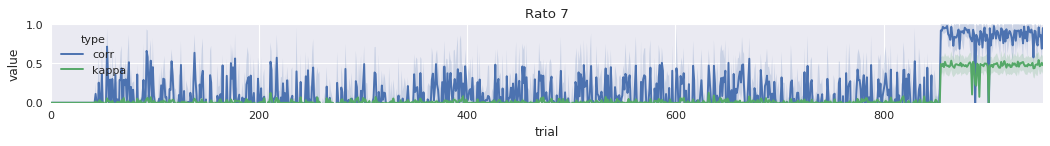

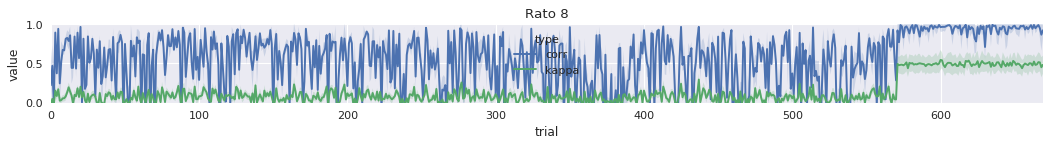

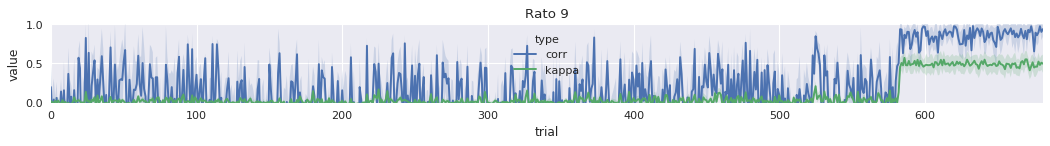

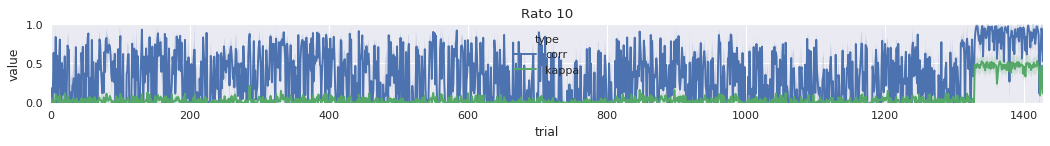

In [11]:
evolutionPlot(results)

In [72]:
results

,Late corr,Late kappa,Early corr,Early kappa,Cross late train corr,Cross late train kappa,Cross early train corr,Cross early train kappa,perTrialCorr,perTrialKappa,best Params
rat 7,"[[0.395839477619, 0.715536207335, 0.3706572253...","[[2.22044604925e-16, 0.105263157895, -0.052631...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0879398252419, 0.0638562058283, 0.120050701...","[0.0570968718627, 0.0367950781331, 0.066513954...","[0.0461995637839, 0.0577632516883, 0.036045427...","[0.0290397020632, 0.0249426584891, 0.018256076...",shuffle0 shuffle1 shuffle2 shuffle3 s...,shuffle0 shuffle1 shuffle2 shuffle3 s...,"{'gamma': 0.02, 'C': 11}"
rat 8,"[[0.668116464225, -0.441744675664, 0.902723414...","[[0.105263157895, 0.0, 0.157894736842, 0.15789...","[[-0.210501605991, 0.662363656064, 0.211265690...","[[0.0, 0.0, -0.0526315789474, 0.157894736842, ...","[0.480203498519, 0.530376100243, 0.50468616098...","[0.377506513275, 0.4001013789, 0.387503355997,...","[0.49792289239, 0.446485391399, 0.458784878211...","[0.341484198437, 0.321508967587, 0.32882275464...",shuffle0 shuffle1 shuffle2 shuffle3 s...,shuffle0 shuffle1 shuffle2 shu...,"{'gamma': 0.005, 'C': 11}"
rat 9,"[[-0.183782888812, -0.293750489747, -0.3760741...","[[2.22044604925e-16, -0.0526315789474, 0.0, 0....","[[-0.0527344755831, -0.10667164948, -0.6875098...","[[0.0, 0.0, -0.0526315789474, 0.0526315789474,...","[0.137049435931, 0.0018846971691, -0.035660779...","[0.124118666348, 0.0284915881589, 0.0157942309...","[0.0214678044563, 0.0407963562486, 0.037830318...","[0.0119340522891, 0.0119256578615, 0.036555834...",shuffle0 shuffle1 shuffle2 shuffle...,shuffle0 shuffle1 shuffle2 ...,"{'gamma': 0.005, 'C': 10}"
rat 10,"[[0.186369453138, 0.414458191894, 0.7622587251...","[[2.22044604925e-16, 0.0, 0.0, 0.157894736842,...","[[0.222145198575, 0.126427200965, 0.2503613039...","[[0.0526315789474, 0.105263157895, 0.0, 0.2105...","[0.253024700538, 0.302178929164, 0.27674885674...","[0.13700296357, 0.171608314001, 0.167774213526...","[0.197713937714, 0.237436342267, 0.24098833117...","[0.13303403729, 0.136336165523, 0.156698906885...",shuffle0 shuffle1 shuffle2 shuffle3 ...,shuffle0 shuffle1 shuffle2 ...,"{'gamma': 0.005, 'C': 16}"


---

In [ ]:
from sklearn.svm import SVC
from spikeHelper.experiments import *

In [ ]:
clf=SVC()
n_splits = 3
results = {}

ypred, ytrue = eachSame(clf, data[data['end']], n_splits)
results['late'] = {}
results['late']['corr'] = np.array([[st.pearsonr(ypred[ti, clfi, :], ytrue[ti,:])[0] for ti in range(ypred.shape[0])] for clfi in range(ypred.shape[1])])
results['late']['kappa'] = np.array([[cohen_kappa_score(ypred[ti, clfi, :], ytrue[ti,:]) for ti in range(ypred.shape[0])] for clfi in range(ypred.shape[1])])


ypred, ytrue = eachSame(clf, data[data['beg']], n_splits)
results['early'] = {}
results['early']['corr'] = np.array([[st.pearsonr(ypred[ti, clfi, :], ytrue[ti,:])[0] for ti in range(ypred.shape[0])] for clfi in range(ypred.shape[1])])
results['early']['kappa'] = np.array([[cohen_kappa_score(ypred[ti, clfi, :], ytrue[ti,:]) for ti in range(ypred.shape[0])] for clfi in range(ypred.shape[1])])


In [ ]:
np.array([[st.pearsonr(ypred[ti, clfi, :], ytrue[ti,:])[0] for ti in range(ypred.shape[0])] for clfi in range(ypred.shape[1])])

In [2]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import scipy.stats as st
from sklearn.base import clone
from scipy.io import loadmat
import pickle

from spikeHelper.visuals import trialNeuronPlot, firingRateEvo, heatAct
from spikeHelper.loadSpike import loadSpikeBehav
from spikeHelper.dataOrganization import trialToXyT, getX, normRows
from spikeHelper.filters import convHist, filterEpochs


In [8]:
data = trialToXyT(pickle.load(open('Data/50ms_r8_1300msPlus1s.pickle','rb')))
rat = 'rat 8'

sh = StratifiedShuffleSplit(n_splits = 10, test_size=None, train_size = .5)
trial = data['trial']
ypred = [];

In [9]:
Xi = getX(data)[trial!=1,:]

In [11]:
Xi.shape

(13400, 37)

In [13]:
Xj = getX(data)
Xj.shape

(13420, 37)

In [25]:
yi = data['y'][trial!=1]
shuffle = sh.split(Xi,yi)
idxes = []
for idx,_ in shuffle:
    idxes.append(idx)

In [43]:
cdata = data.iloc[(trial!=1).values,:]
cdata.head()

,unit1,unit2,unit3,unit4,unit5,unit6,unit7,unit8,unit9,unit10,...,unit32,unit33,unit34,unit35,unit36,unit37,y,trial,end,beg
0,0.000000,0.0,6.266175,8.155021,2.724771,2.489254,8.236212,13.530960,9.730723,7.828788,...,3.909070,0.0,0.366401,0.0,6.346805,0.000000,0,0,False,True
1,0.000000,0.0,7.966739,11.509592,3.738582,3.545643,10.860934,17.871892,12.141538,6.570939,...,4.149043,0.0,0.955308,0.0,8.088933,0.012599,1,0,False,True
2,0.000000,0.0,8.531930,13.457019,4.231268,3.950338,11.373212,21.720694,12.921861,4.670355,...,3.883445,0.0,1.985726,0.0,8.896452,0.132012,2,0,False,True
3,0.070968,0.0,8.156690,13.133248,4.222032,3.442652,9.458162,25.168815,11.841260,3.516232,...,3.802472,0.0,3.303706,0.0,8.638694,0.425257,3,0,False,True
4,0.296570,0.0,7.493791,10.935203,4.508843,2.346734,6.290256,27.931250,9.285706,3.735323,...,4.372450,0.0,4.467961,0.0,7.597216,1.071246,4,0,False,True


In [64]:
[(cdata.iloc[idxes[2],:]['y'] == yi).sum() for yi in np.unique(data['y'].values)]

[335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335,
 335]

In [66]:
cdata.iloc[:40,:]

,unit1,unit2,unit3,unit4,unit5,unit6,unit7,unit8,unit9,unit10,...,unit32,unit33,unit34,unit35,unit36,unit37,y,trial,end,beg
0,0.000000,0.000000,6.266175,8.155021,2.724771,2.489254,8.236212,13.530960,9.730723,7.828788,...,3.909070,0.0,0.366401,0.000000,6.346805,0.000000,0,0,False,True
1,0.000000,0.000000,7.966739,11.509592,3.738582,3.545643,10.860934,17.871892,12.141538,6.570939,...,4.149043,0.0,0.955308,0.000000,8.088933,0.012599,1,0,False,True
2,0.000000,0.000000,8.531930,13.457019,4.231268,3.950338,11.373212,21.720694,12.921861,4.670355,...,3.883445,0.0,1.985726,0.000000,8.896452,0.132012,2,0,False,True
3,0.070968,0.000000,8.156690,13.133248,4.222032,3.442652,9.458162,25.168815,11.841260,3.516232,...,3.802472,0.0,3.303706,0.000000,8.638694,0.425257,3,0,False,True
4,0.296570,0.000000,7.493791,10.935203,4.508843,2.346734,6.290256,27.931250,9.285706,3.735323,...,4.372450,0.0,4.467961,0.000000,7.597216,1.071246,4,0,False,True
5,0.920265,0.000000,7.026592,8.145936,5.768712,1.251195,3.586231,28.958341,6.120750,5.025212,...,5.540516,0.0,5.260892,0.000000,6.222281,2.110444,5,0,False,True
6,2.148443,0.000000,6.721852,6.359709,7.753417,0.545519,2.331422,27.089273,3.389820,6.518006,...,6.751988,0.0,5.749492,0.000000,5.388151,3.251943,6,0,False,True
7,4.012821,0.000000,6.315765,6.622130,9.511477,0.331962,2.841816,22.527023,1.744428,7.677710,...,7.687595,0.0,6.336992,0.000000,5.997320,3.919408,7,0,False,True
8,6.021747,0.000000,5.631025,8.748966,10.199929,0.528228,4.863760,16.990677,1.494207,8.589795,...,8.577989,0.0,7.198529,0.000000,8.601605,3.695025,8,0,False,True
9,7.298020,0.000000,4.766566,11.287856,10.043496,1.227753,7.647862,12.749699,2.455347,10.248802,...,9.689567,0.0,8.304792,0.000000,12.737236,2.724771,9,0,False,True


In [48]:
idxes[0]

array([8628, 2337,   98, ..., 9454, 8944, 8936])

In [ ]:
for ti in np.unique(trial):
    Xi = getX(data)[trial!=ti,:]
    yi = data['y'][trial!=ti]
    shuffle = sh.split(Xi,yi)
    ypred.append([])
    if ti % 10 == 0:  print('Analyzing trial ' +str(ti))
    for idx,_ in shuffle:
        clf = clone(clf)
        clf.fit(Xi[idx,:],yi.as_matrix()[idx])
        ypred[-1].append(clf.predict(getX(data)[trial==ti,:]))